<a id='table_of_contents'></a>

# Table of Contents
0. [Import Libraries and Data](#imports) 
1. [Data Exploration](#data_exploration)
2. [Helper Functions](#functions)
3. [Data Cleaning](#clean_data)
4. [Netfilx Analysis](#netflix)
5. [Movies vs TV Shows](#comparsion)

<a id='imports'></a>
# Import Libraries and Data
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# Data Exploration
[Back to top](#table_of_contents)

In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7160,s7161,Movie,Kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...
4848,s4849,TV Show,Something in the Rain,NaN,"Son Ye-jin, Jung Hae-in, Jang So-yeon",South Korea,"May 26, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",Reunited with her best friend’s younger brothe...
4374,s4375,Movie,Sabrina,Rocky Soraya,"Luna Maya, Christian Sugiono, Sara Wijayanto, ...",Indonesia,"November 20, 2018",2018,TV-MA,114 min,"Horror Movies, International Movies",A toy manufacturer and his wife are terrorized...
8466,s8467,Movie,The Princess and the Frog,"Ron Clements, John Musker","Anika Noni Rose, Bruno Campos, Keith David, Mi...",United States,"July 16, 2019",2009,G,98 min,Children & Family Movies,"In New Orleans during the Jazz Age, a beautifu..."
5685,s5686,Movie,Other People,Chris Kelly,"Jesse Plemons, Molly Shannon, Bradley Whitford...",United States,"December 8, 2016",2016,TV-MA,97 min,"Comedies, Dramas, Independent Movies","After a bad breakup, a struggling New York com..."


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='functions'></a>
# Helper Functions
[Back to top](#table_of_contents)

In [8]:
def split_and_count(df,name,value):
    result = df[name].str.split(', ').explode().value_counts().head(value)
    return result

In [9]:
def labels(title,xlable,ylable,legend,grid):
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel(ylable, fontsize=12)
    plt.legend(title=legend)
    if grid:
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

In [10]:
def Barplot(x_size,y_size,df,p,title,xlable,ylable):
    plt.figure(figsize=(x_size, y_size))
    sns.barplot(x=df.index, y=df.values, palette=p)
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show()

In [11]:
def visual(x1,y1,x2,y2,p1,p2,movie_title,movie_tv_show):
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1)
    ax[0].set_title(movie_title)
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2)
    ax[1].set_title(movie_tv_show)
    plt.tight_layout()
    plt.show()

<a id='clean_data'></a>
# Data Cleaning
[Back to top](#table_of_contents)

In [12]:
netflix_df = netflix_df.dropna(subset=['duration'])

movie_mask = netflix_df['type'] == 'Movie'

netflix_df.loc[movie_mask, 'duration'] = (
    netflix_df.loc[movie_mask, 'duration']
    .astype(str)
    .str.extract('(\d+)')[0] 
)

netflix_df.loc[movie_mask, 'duration'] = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

tv_shows = netflix_df[netflix_df["type"]=="TV Show"].copy()
movies = netflix_df[netflix_df["type"]=="Movie"] .copy()

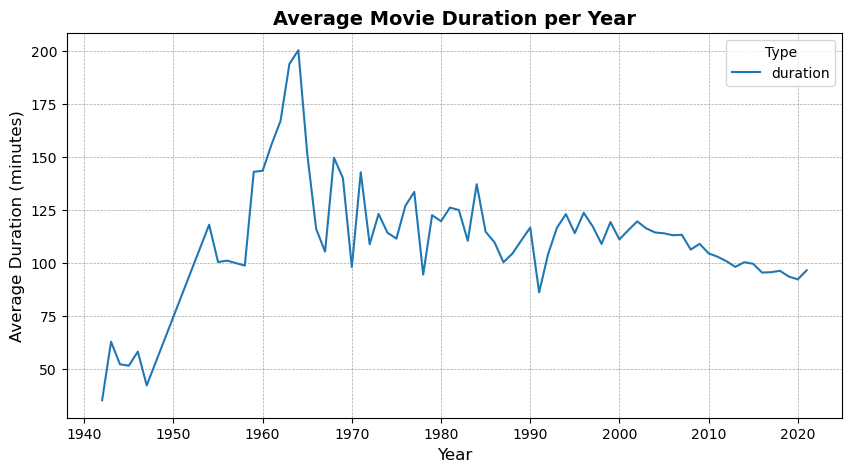

In [13]:
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().sort_index()
plt.figure(figsize=(10, 5))
avg_duration_per_year.plot()
labels('Average Movie Duration per Year','Year','Average Duration (minutes)','Type',True)
plt.show()

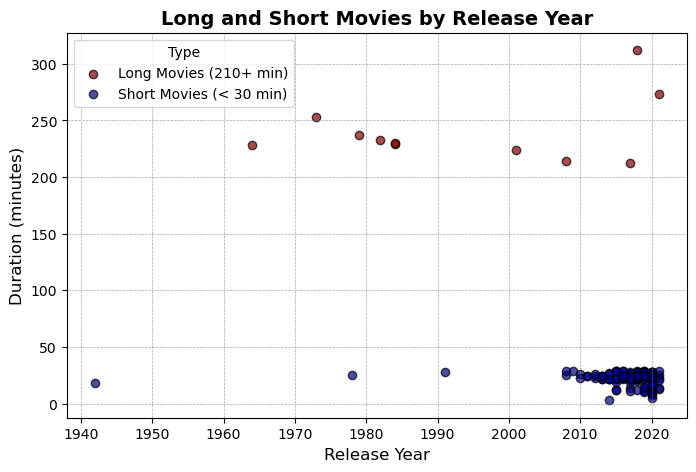

In [14]:
long_movies = movies[movies['duration'] >= 210]
short_movies = movies[movies['duration'] < 30] 

plt.figure(figsize=(8, 5))

plt.scatter(long_movies['release_year'], long_movies['duration'], 
            color='darkred', alpha=0.7, edgecolor='black', label='Long Movies (210+ min)')

plt.scatter(short_movies['release_year'], short_movies['duration'], 
            color='darkblue', alpha=0.7, edgecolor='black', label='Short Movies (< 30 min)')  

labels('Long and Short Movies by Release Year','Release Year','Duration (minutes)','Type',True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
longest_movie = long_movies[long_movies['duration'] > 300]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [16]:
numeric_mask = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

netflix_df.loc[movie_mask & (numeric_mask > 300), 'duration'] = 90
netflix_df.loc[movie_mask & (numeric_mask < 30), 'type'] = "Short Movie"

movies = netflix_df[netflix_df["type"] == "Movie"].copy()
short_movies = netflix_df[netflix_df["type"] == "Short Movie"].copy()

<a id='netflix'></a>
# Netflix Analysis
[Back to top](#table_of_contents)

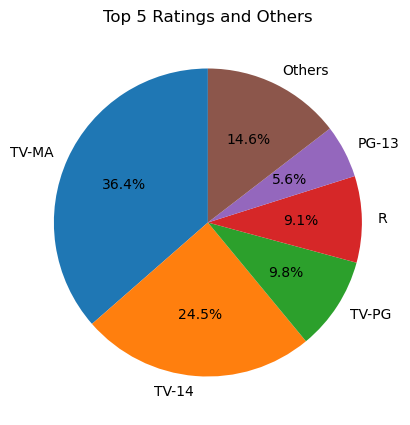

In [17]:
top_5_rating_sum = netflix_df['rating'].value_counts().head(5).sum()
others_rating_sum = netflix_df['rating'].value_counts().sum()-top_5_rating_sum
top_5_rating = netflix_df['rating'].value_counts().head(5)
top_5_rating['Others'] = others_rating_sum
plt.figure(figsize=(5, 5))
plt.pie(top_5_rating, labels=top_5_rating.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Ratings and Others')
plt.show()

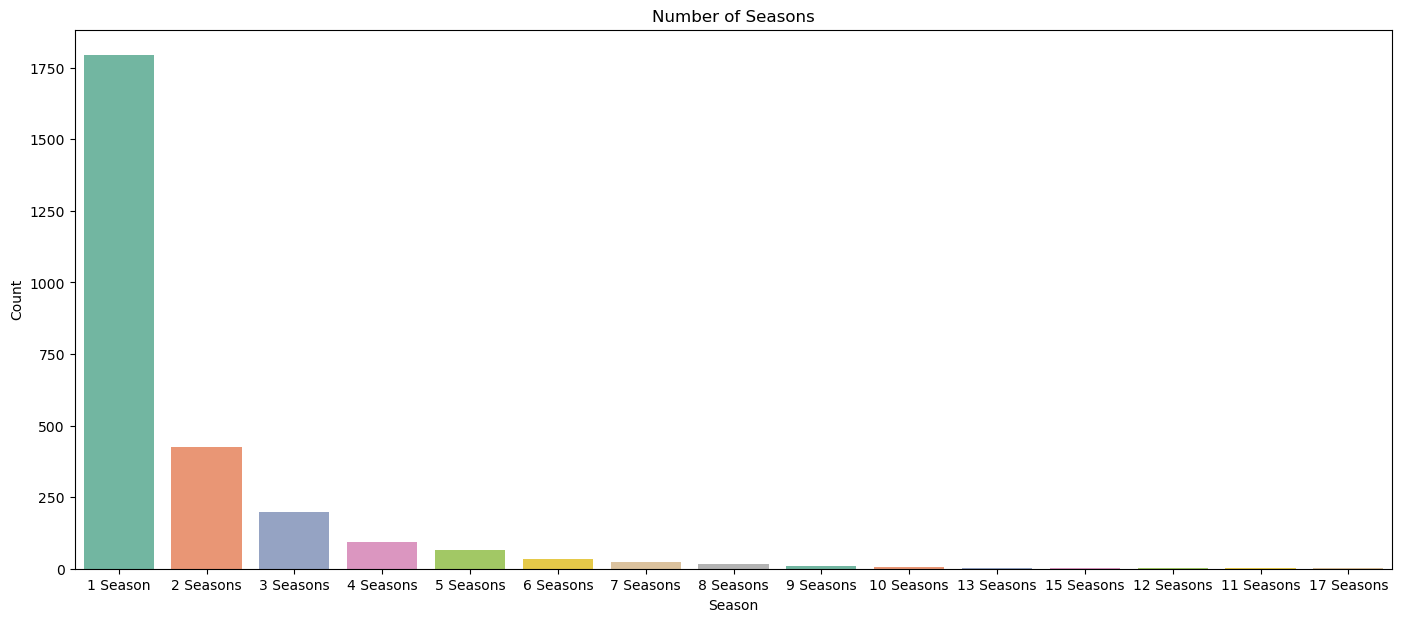

In [18]:
tv_show_seasons = tv_shows['duration'].value_counts()
Barplot(17,7,tv_show_seasons,'Set2','Number of Seasons','Season','Count')

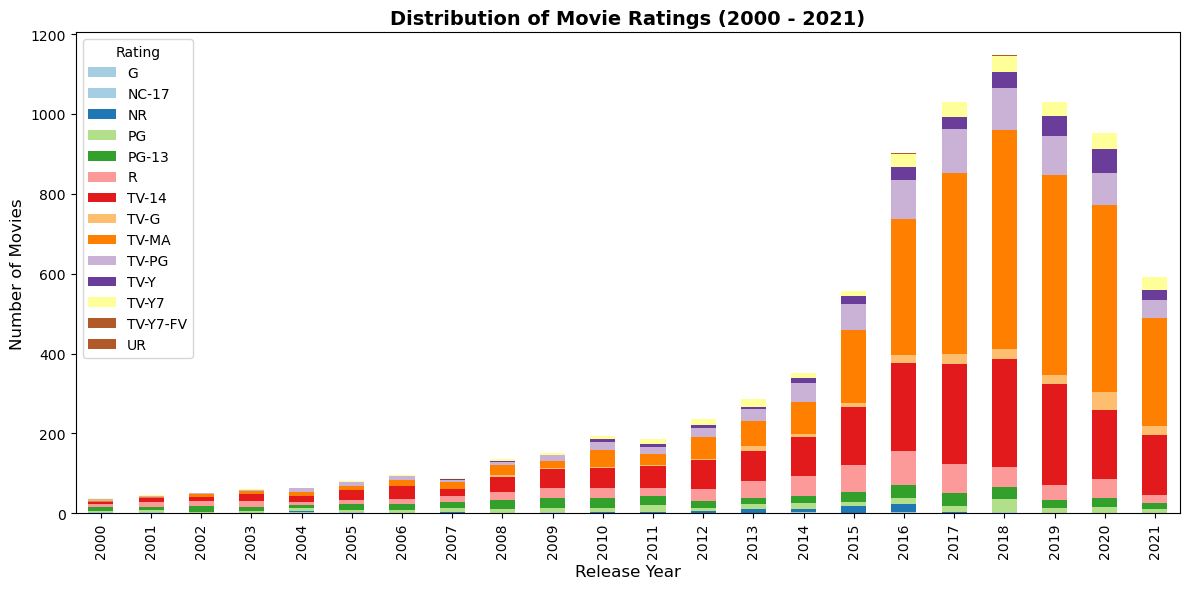

In [19]:
rating_per_year = netflix_df.groupby('release_year')['rating'].value_counts().unstack(fill_value=0)
rating_per_year = rating_per_year[rating_per_year.index > 1999]
rating_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
labels('Distribution of Movie Ratings (2000 - 2021)','Release Year','Number of Movies','Rating',False)
plt.tight_layout()
plt.show()

<a id='comparsion'></a>
# Movies vs TV Shows
[Back to top](#table_of_contents)

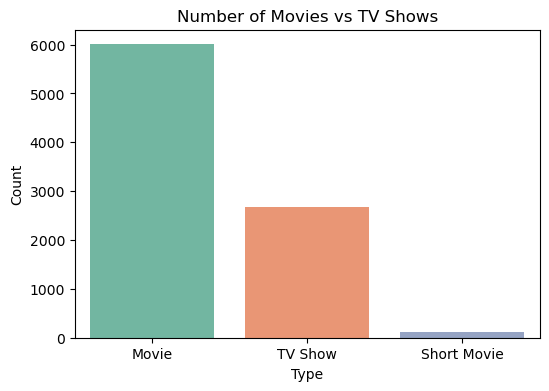

In [20]:
type_counts = netflix_df['type'].value_counts()
Barplot(6,4,type_counts,'Set2','Number of Movies vs TV Shows','Type','Count')

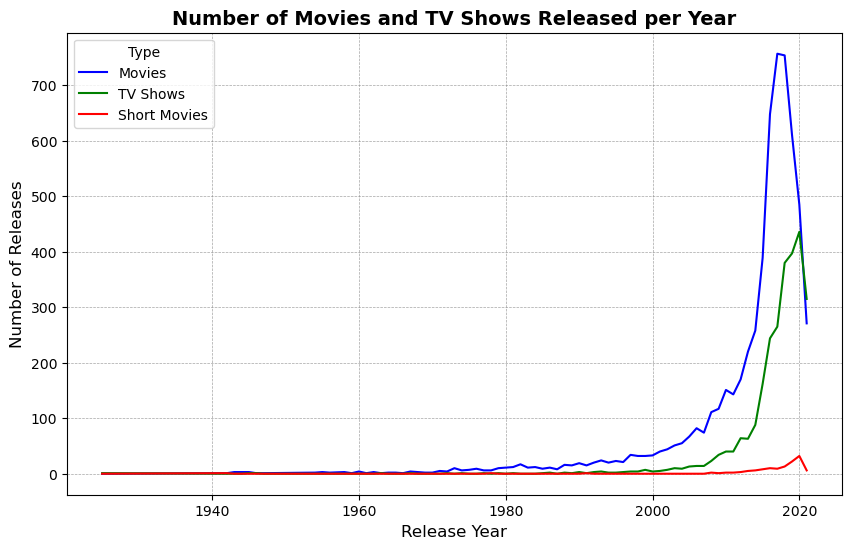

In [21]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='blue', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='green', label='TV Shows')
plt.plot(content_counts.index, content_counts['Short Movie'], linestyle='-', color='red', label='Short Movies')
labels('Number of Movies and TV Shows Released per Year','Release Year','Number of Releases',"Type",True)
plt.show()

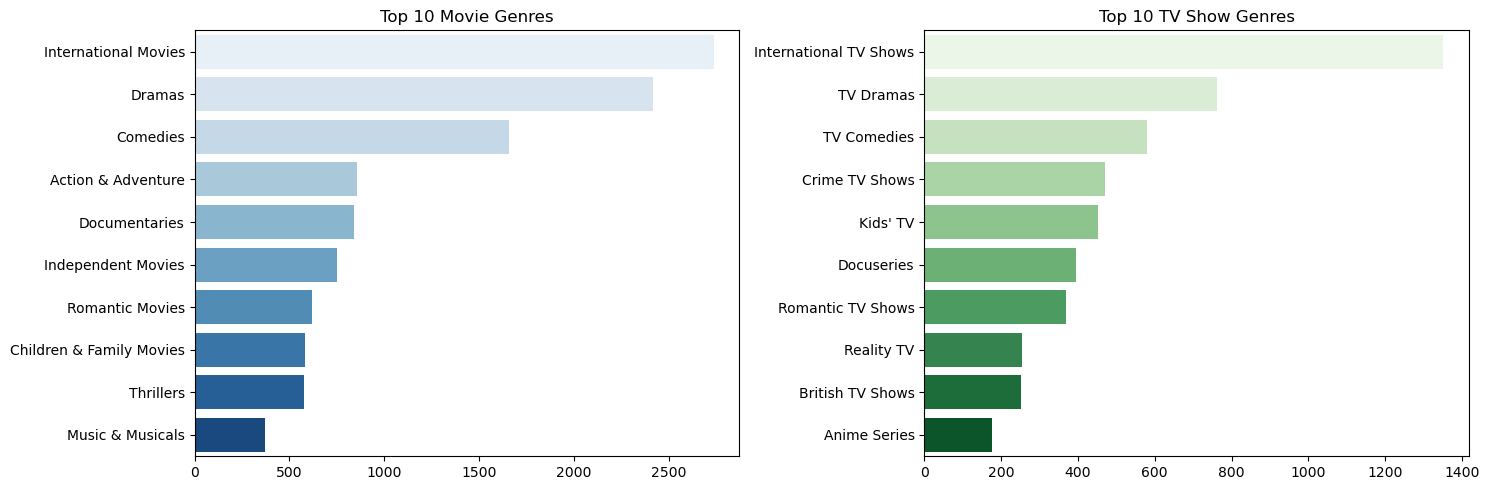

In [22]:
movie_genres = split_and_count(movies,'listed_in',10)
tv_show_genres = split_and_count(tv_shows,'listed_in',10)
visual(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,
       'Blues','Greens','Top 10 Movie Genres','Top 10 TV Show Genres')

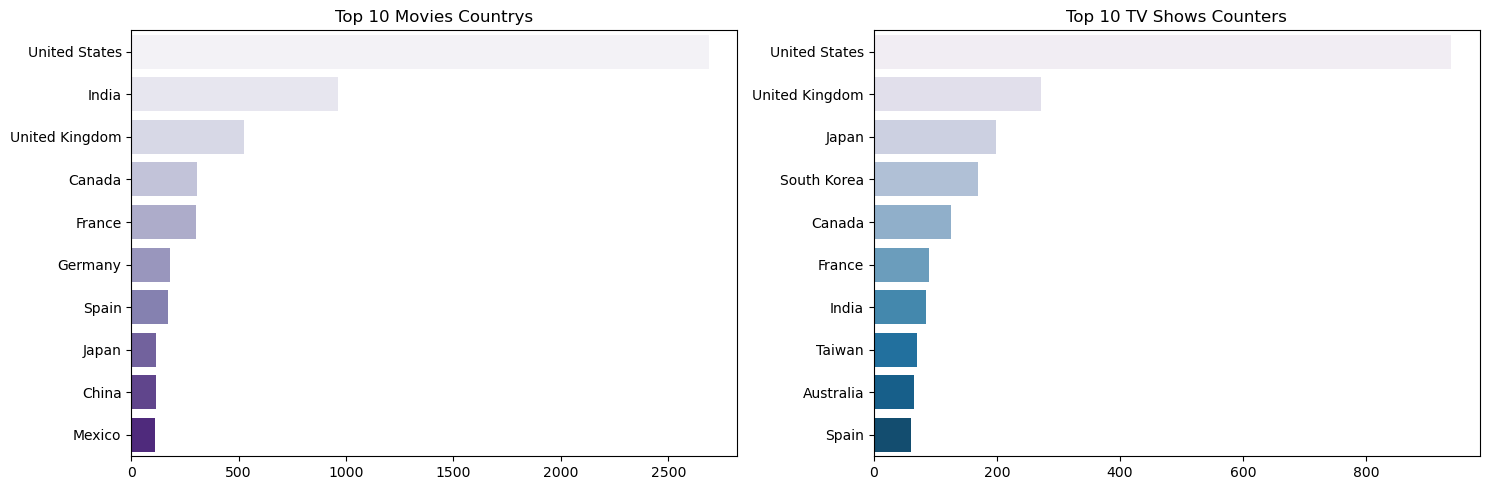

In [23]:
movie_countrys = split_and_count(movies,'country',10)
tv_show_countrys = split_and_count(tv_shows,'country',10)
visual(movie_countrys.values,movie_countrys.index,tv_show_countrys.values,tv_show_countrys.index,
       'Purples','PuBu','Top 10 Movies Countrys','Top 10 TV Shows Counters')

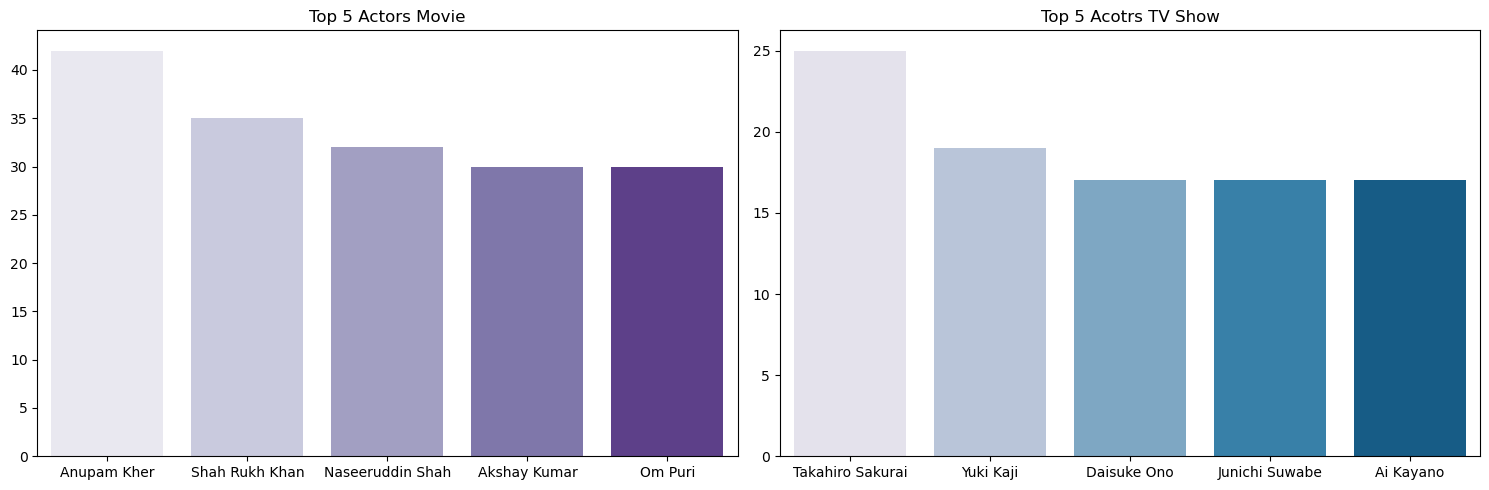

In [24]:
movie_actors = split_and_count(movies,'cast',5)
tv_show_actors = split_and_count(tv_shows,'cast',5)
visual(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,
       'Purples','PuBu','Top 5 Actors Movie','Top 5 Acotrs TV Show')